<a href="https://colab.research.google.com/github/kruthof/lectures/blob/main/101_RL_German.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einführung Reinforcement Learning 

Eine der zentralen Fragestellung im Reinforcement Learning ist, wie man die beste Aktion in einer bestimmten Situation wählt, so das der Erwartungswert der (langfristigen) Rewards maximiert wird. Aber wie genau können wir mittels Reinforcement Learning Probleme lösen? Dieses Notebook gibt einen praktischen Einblick in den Aufbau eines RL-Experiments.

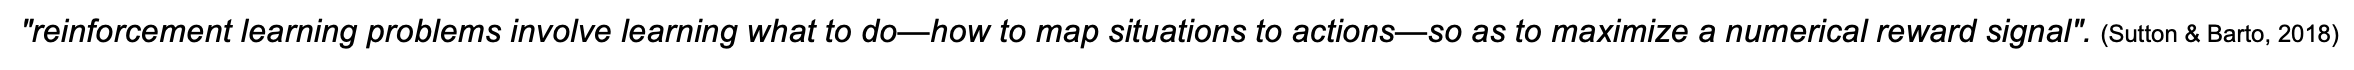
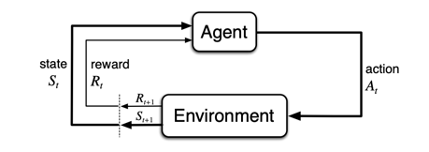

In [6]:
%%capture
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines3
!pip install imageio==2.4.1
!pip install gym
!pip install box2d-py
!pip install gym[box2d]
!pip install pyglet==1.5.27

# Environment
In einem ersten Schritt definieren wir das Environment, mit dem unser Algorithmus interagieren kann. [OpenAI’s gym](https://www.gymlibrary.dev/content/basic_usage/) package bietet ein hervorragendes Framework, mittels dem man RL Environments erstellen kann. 

Für das Benchmarking neuer Algorithmen werden häufig bestehende Environments benutzt, z.B. ATARI oder box2D (S. OpenAI Website). Um spezifische Probleme zu lösen bietet es sich jedoch meist an, ein eigenes Environment zu schreiben. 

## Aufbau Environment

Wollen wir ein eigenes Environment mittels gym erstellen, müssen wir die gyn.Env - Klasse erweitern. Bei der Initialisierung definieren wir den Aktions- und Observationsraum. In unserem Fall erlauben wir dem Agenten lediglich das Ausführen von diskreten Aktionen, z.B. "steuere links" oder "steuere rechts". 

    class CustomEnv(gym.Env):
      """Custom Environment that follows gym interface"""
     

      def __init__(self, arg1, arg2, ...):
        super(CustomEnv, self).__init__()
        # Definiere den Aktion-Space
        self.action_space = spaces.Discrete(N_DISCRETE_ACTIONS)
        # Definiere den Observations-Space:
        self.observation_space = spaces.Box(low=0, high=255, shape=
                        (HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)
        def step(self, action):
        # Execute one time step within the environment
        ...

Unsere neue CustomEnv-Klasse muss zudem verschiedene Methoden beinhalten. 

    def step(self, action):
      ...
Definiert, was bei der Interaktion zwischen Agenten und Environment geschehen soll. Als Return-Value wird der Reward der Aktion und der neue State wiedergegeben.

    def reset(self):
      ...
Reset stellt am Ende eines Trainingszykluses sicher, dass alle Variablen des Environments ihre Ausgangswerte bekommen.

    def render(self):
      ...
Die Render - Funktion visualisiert den Output am Screen.






## Model-Training
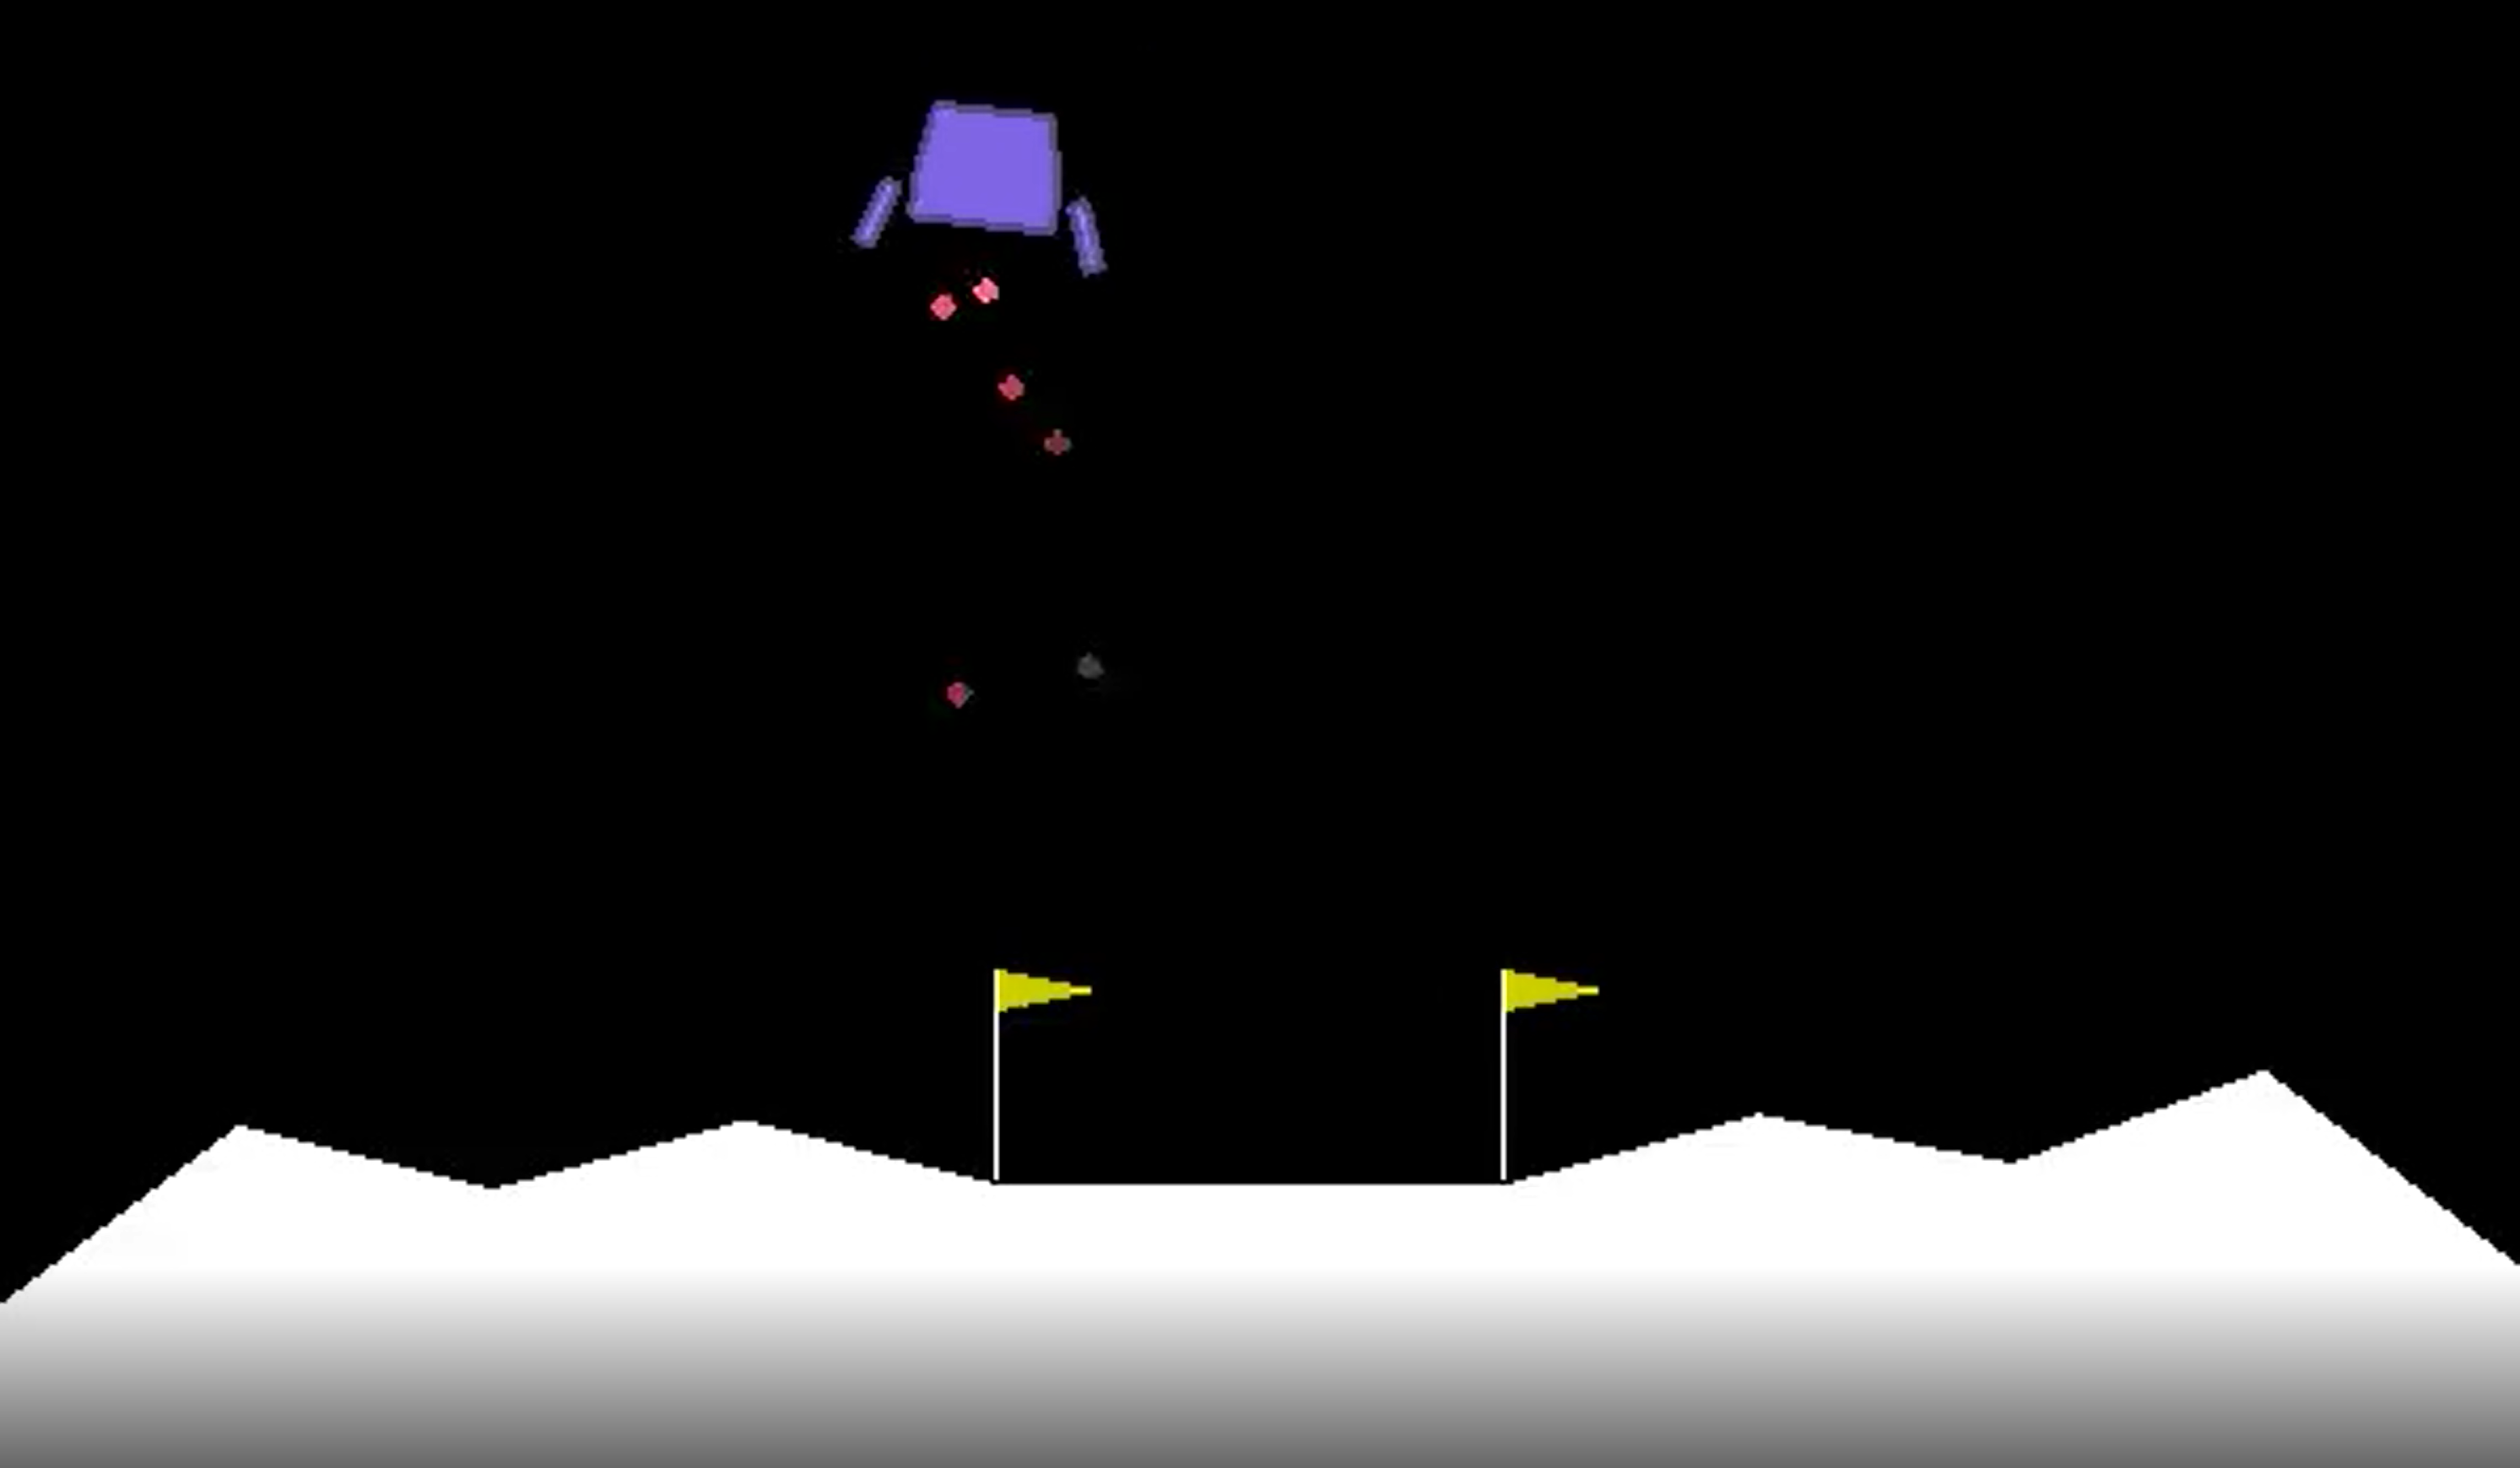
Im Rahmen dieses Tutorials werden wir ein bestehendes Environment benutzen, [LunarLander-v2 ](https://www.gymlibrary.dev/environments/box2d/lunar_lander/). Der Aktions- und Observationsraum hat folgende Eigenschaften:

**Action Space**: Discrete(4)

**Observation Shape**: (8,)

Der Aktionsraum ermöglicht uns vier Interaktionsvarianten in diskreten Schritten (links, rechts, Antrieb an, Antrieb aus). Der Observationsraum definiert z.B. die Position und Geschwindigkeit des Lunar Landers. 


Dieses Environment ist bereits im gym Package enthalten. Nachdem wir das gym Package importiert haben, können wir das Environment wie folgt festlegen:




In [10]:
import gym

#create the environment
env = gym.make('LunarLander-v2')


In einem nächsten Schritt benutzen wir das Reinforcement Learning Framework "stable baselines 3", um die Policy zu erlernen. Als RL-Methode möchten wir PPO (Proximity Policy Optimization) anwenden. Die Policy soll zudem mit einem einfachen neuronalem Netz repräsentiert werden ('MlpPolicy'). Bei der Initialisierung des Models müssen wir zudem unser erstelltes Environment angeben.

In [ ]:
from stable_baselines3 import PPO

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)

Nun können wir mit dem Optimizerungsprozess starten. Mittels total_timesteps definieren wir die Trainingsdauer. Anschliessend speichern wir das Model unter ppo_lunar2

In [11]:
# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e2))
# Save the agent
model.save("ppo_lunar2")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.8     |
|    ep_rew_mean     | -203     |
| time/              |          |
|    fps             | 1751     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------


Nachdem unser Modeltraining beendet ist, können wir Dieses direkt anwenden und evaluieren. Die Funktion env.render() ist im folgenden Code auskommentiert. Wenn sie das Notebook lokal ausführen, bietet ihnen die render-Funktion eine Visualisierung des Lunar Environment und der Anwendung der erlernten Policy. 

In [12]:
# Load the trained agent
#model = PPO.load("ppo_lunar", env=env)

# Enjoy trained agent
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    if dones:
        obs = env.reset()

Have Fun! :) 

# Links

- [Stable Baseline 3 Dokumentation](https://stable-baselines3.readthedocs.io/en/master/)
- [Textbuch Reinforcement Learning](https://mitpress.mit.edu/9780262039246/reinforcement-learning/)
- [Q-Learning mittels Pytorch](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)
- [REINFORCE Algorithm Tutorial](https://medium.com/@thechrisyoon/deriving-policy-gradients-and-implementing-reinforce-f887949bd63)